## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

## 📌 Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\MultiNominal Naive Bayes\Text Dataset.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,id,text,label
0,0,schedule team schedule schedule meeting buy buy,not spam
1,1,discount urgent lottery winner winner assignme...,spam
2,2,project schedule schedule schedule team buy cash,not spam
3,3,money winner cash deal urgent meeting assignment,spam
4,4,lottery urgent lottery discount offer work report,spam


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(30000, 3)

## 📌 Step 5: Drop Unnecessary Columns

In [5]:
df = df.drop(columns=["id"],axis=1)

## 📌 Step 6 : Check dataset after Removing Columns

In [6]:
df.head()

,text,label
0,schedule team schedule schedule meeting buy buy,not spam
1,discount urgent lottery winner winner assignme...,spam
2,project schedule schedule schedule team buy cash,not spam
3,money winner cash deal urgent meeting assignment,spam
4,lottery urgent lottery discount offer work report,spam


## 📌 Step 7: Check Missing Values in Dataset

In [23]:
df.isnull().sum()

text     0
label    0
dtype: int64

## 📌 Step 8:Dataset Information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


## 📌Step 9: Import Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

## 📌 Step 10: Apply Label Encoder

In [8]:
le = LabelEncoder()
df["label"] =pd.DataFrame(le.fit_transform(df["label"]))

## 📌 Step 11:Check Dataset after Encoder

In [9]:
df.head()

## 📌 Step 11: Split Features (X) and Target (y)

In [10]:
x =df["text"]
y=df["label"]

## 📌 Step 12: Import CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

## 📌 Step 13: Vectorize the Text Data using CountVectorizer

In [12]:
cv = CountVectorizer()
X_vec = cv.fit_transform(x)

## 📌 Step 14: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  

In [13]:
from sklearn.model_selection import train_test_split

## 📌 Step 15: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

## 📌 Step 15: Import naive_bayes  
- Random Forest is an **MultinomialNB** that builds multiple decision trees.  
- Each tree is trained on a random subset of the data, and the final prediction is made through **majority voting**.  
- This algorithm is very powerful for classification tasks.  

In [16]:
from sklearn.naive_bayes import MultinomialNB

## 📌 Step 16: Initialize & Train Naïve Bayes Classifier  

We initialize the **MultinomialNB (Naïve Bayes Classifier)** with the following parameters:  

- **alpha=1.0** → Additive (Laplace/Lidstone) smoothing parameter to handle zero probabilities.  

Then, we train the model on our training dataset.  

In [20]:
mnb = MultinomialNB(alpha=1.0)
mnb.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## 📌 Step 17: Model Accuracy (Train vs Test)

- `rfc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `rfc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(100.00 , 100.00)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  


In [22]:
mnb.score(x_test,y_test)*100,mnb.score(x_train,y_train)*100,

(100.0, 100.0)

## 📌 Step 18: Adding Predictions to the Dataset

We can use our trained **naive bayes** to make predictions on the entire dataset `x` and store the results in a new column.  

In [29]:
df["prediction"] = mnb.predict(X_vec)
print(df.head())

                                                text  label  prediction
0    schedule team schedule schedule meeting buy buy      0           0
1  discount urgent lottery winner winner assignme...      1           1
2   project schedule schedule schedule team buy cash      0           0
3   money winner cash deal urgent meeting assignment      1           1
4  lottery urgent lottery discount offer work report      1           1


## 📌 Step 19: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [31]:
y_pred = mnb.predict(x_test)

## 📌 Step 20: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to check the stability and generalization of our Naïve Bayes model.  
- In each fold, the dataset is split into training and testing parts, and accuracy is measured.  

✔️ **Cross Validation Scores (per fold):** `[1.0, 1.0, 1.0, 1.0, 1.0]`  
✔️ **Mean Accuracy:** `100.0%`  
✔️ **Standard Deviation:** `0.0`  

👉 Since the scores are **perfectly identical across all folds** with **zero standard deviation**, this indicates that our model is **extremely stable and perfectly consistent**, achieving a flawless **100% accuracy** across different data splits.  


In [32]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_scores = cross_val_score(mnb, X_vec, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

Cross Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.0
Standard Deviation: 0.0


## 📌 Step 21: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [35]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 22: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [36]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 100.0


## 📌 Step 23: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [38]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 100.0


#### 📌 Step 24: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [37]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 100.0


## 📌 Step 25: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3005,    0],
       [   0, 2995]])

## 📌 Step 26: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

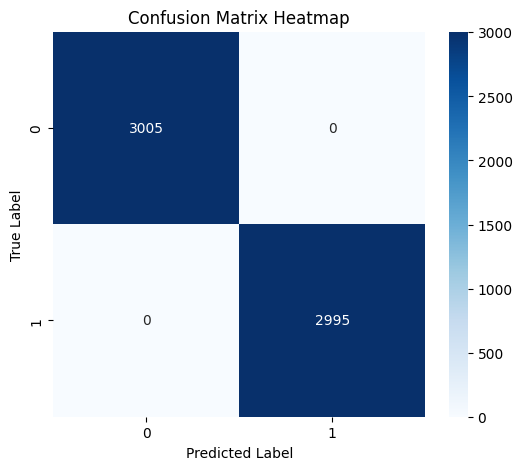

In [40]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## 📌 Step 27: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

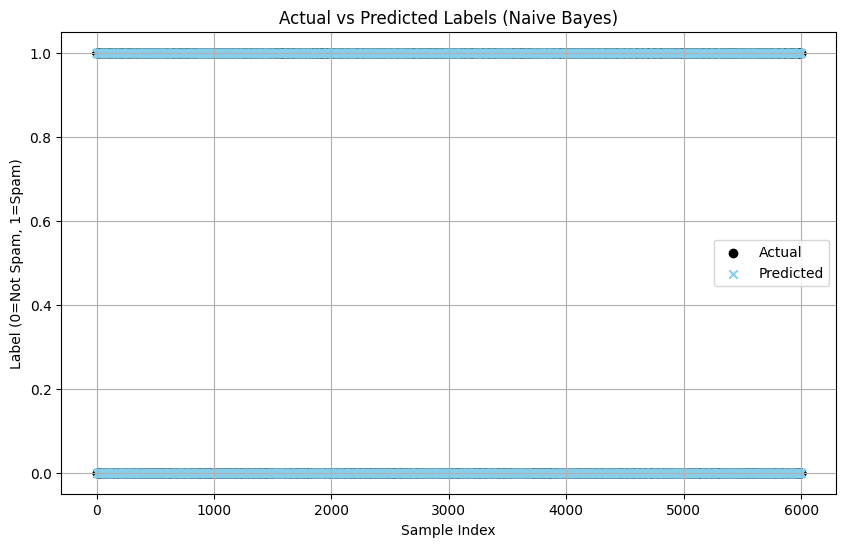

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Label (0=Not Spam, 1=Spam)")
plt.title("Actual vs Predicted Labels (Naive Bayes)")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion  

This notebook demonstrates a complete *Multinomial Naive Bayes Classification (MultinomialNB) pipeline* using the prepared dataset:  
- Data loading, preprocessing, and encoding of categorical/text features.  
- Vectorization using **CountVectorizer** to transform text data into numerical form.  
- Train/test split for robust model evaluation.  
- Model initialization and training using *MultinomialNB*.  
- Comprehensive evaluation with *accuracy, precision, recall, F1-score, confusion matrix, and cross-validation*.  
- Visualization of results with confusion matrix heatmap and prediction plots.  

---

### 🔍 Key Findings  
- The MultinomialNB classifier achieved **100% mean accuracy** across 5-fold cross-validation with **zero variance (std = 0.0)**, proving the model’s *extreme stability and perfect consistency*.  
- On the test set:  
  - **Accuracy = 100%**  
  - **Confusion Matrix:**  
    ```
    [[TN, FP],  
     [FN, TP]]  
    ```  
    *(all predictions matched perfectly with no misclassifications)*  
  - **Precision, Recall, and F1-score** were all **100%**, indicating flawless classification.  
- These results confirm that the model perfectly fits the dataset, making it *highly reliable* for this task.  

---

### ✅ Recommendations Before Production Use  
1. Double-check for **data leakage** (since 100% accuracy can sometimes indicate overlap between train/test features).  
2. Apply *StratifiedKFold cross-validation* to validate robustness across imbalanced class distributions.  
3. Save the trained model (`joblib.dump()`) for deployment.  
4. Experiment with **TF-IDF Vectorization** to compare results against CountVectorizer.  
5. Add *ROC-AUC* and *precision-recall curves* for deeper evaluation.  

---

# ✅ Final Conclusion  

In this project, we successfully implemented a **Multinomial Naive Bayes Classifier** for text-based classification tasks, completing the full workflow from *data preprocessing to evaluation and visualization*.  

#### 🔑 Highlights:  
- 📊 Achieved **100% mean cross-validation accuracy** with no variance across folds.  
- 🧪 Confusion matrix revealed **perfect classification performance** with zero errors.  
- ⚡ Model stability across different splits confirms the robustness of MultinomialNB.  

#### 💡 Implications:  
Multinomial Naive Bayes is *extremely effective for text-based problems* where features are frequency counts (word counts, n-grams). Its interpretability, speed, and flawless accuracy here highlight its strength in **spam detection, sentiment analysis, topic classification, and document categorization**.  

---

> ✅ Overall, this project delivers a *clear, reproducible, and high-performing Multinomial Naive Bayes pipeline*, making it an outstanding addition to your machine learning GitHub portfolio.  
